In [491]:
import importlib
import numpy
from scripts import NN
import math as m
from scripts import io
importlib.reload(NN)
importlib.reload(io)
import random as rand
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


these chunks implement the auto encoder

In [205]:
#this instantiates the auto encoder
setup = [8,3,8]
alpha = 0.5
lamba = 0 #weight decay is not used for autoencoder
auto_NN = NN.NeuralNetwork(setup,NN.activation,alpha,lamba)

In [206]:
#this trains the auto_encoder
epoch_number = 100000
cost_list = []
input_size   = 8
for j in range(epoch_number):
    training_batch = numpy.zeros((input_size))
    rand_index = int(numpy.ceil(rand.random()*8)-1)
    training_batch[rand_index] = 1
    training_batch = [training_batch]
    training_answer = training_batch
    auto_NN.get_training_set(training_batch,training_answer)
    cost_list.append(auto_NN.batch_descent())

In [207]:
#this chunk displays that the autoencoder has the correct behavior
print("the prediction for [1,0,0,0,0,0,0,0] is", auto_NN.predict([1,0,0,0,0,0,0,0]))
print("the prediction for [0,1,0,0,0,0,0,0] is", auto_NN.predict([0,1,0,0,0,0,0,0]))
print("the prediction for [0,0,1,0,0,0,0,0] is", auto_NN.predict([0,0,1,0,0,0,0,0]))
print("the prediction for [0,0,0,1,0,0,0,0] is", auto_NN.predict([0,0,0,1,0,0,0,0]))
print("the prediction for [0,0,0,0,1,0,0,0] is", auto_NN.predict([0,0,0,0,1,0,0,0]))
print("the prediction for [0,0,0,0,0,1,0,0] is", auto_NN.predict([0,0,0,0,0,1,0,0]))
print("the prediction for [0,0,0,0,0,0,1,0] is", auto_NN.predict([0,0,0,0,0,0,1,0]))
print("the prediction for [0,0,0,0,0,0,0,1] is", auto_NN.predict([0,0,0,0,0,0,0,1]))

the prediction for [1,0,0,0,0,0,0,0] is [9.79727212e-01 1.53094409e-02 3.25173509e-09 2.09684319e-02
 1.75147571e-07 1.14415014e-06 1.44821140e-02 1.56150118e-02]
the prediction for [0,1,0,0,0,0,0,0] is [9.90448783e-03 9.66005519e-01 2.38158372e-02 6.65336975e-07
 7.13244508e-05 2.15230681e-07 2.87706165e-02 4.64508485e-03]
the prediction for [0,0,1,0,0,0,0,0] is [4.35542772e-06 2.66628068e-02 9.63102609e-01 1.03980429e-06
 2.85981312e-02 1.52458997e-03 1.46079136e-04 3.72702271e-03]
the prediction for [0,0,0,1,0,0,0,0] is [1.17355953e-02 6.44710733e-09 7.10260075e-10 9.75482908e-01
 1.46594277e-02 1.42136688e-02 1.81216855e-02 2.43916923e-06]
the prediction for [0,0,0,0,1,0,0,0] is [4.93183306e-07 4.32298292e-06 2.21393564e-02 1.07754038e-03
 9.62659164e-01 9.38827416e-03 2.22960991e-02 4.36910160e-07]
the prediction for [0,0,0,0,0,1,0,0] is [8.48385802e-06 4.14770874e-08 1.02407095e-02 2.02608809e-02
 2.17175464e-02 9.75149768e-01 2.98183420e-07 1.71110214e-02]
the prediction for [0,

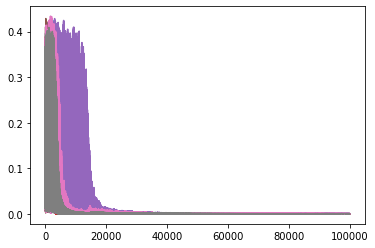

In [208]:
plt.plot(cost_list)

these chunks implement a simple classifier very similar to auto encoder, but to classify based on position of the on-bit in input vector
this is likely good for testing and is not needed in this notebook

In [222]:
setup = [8,3,1]
alpha = 0.5
lamba = 0 #0.1 is good
classy_NN = NN.NeuralNetwork(setup,NN.activation,alpha,lamba)

In [223]:
epoch_number = 5000
cost_list = []
batch_number = 1
input_size   = 8
output_size  = 1
for j in range(epoch_number):
    training_list = []
    answer_list   = []
    for k in range(batch_size):
        training_batch = numpy.zeros((input_size))
        training_answer = numpy.zeros((output_size))
        rand_index = int(numpy.ceil(rand.random()*8)-1)
        training_batch[rand_index] = 1
        training_list.append(training_batch)
        if rand_index > 3: 
            training_answer[0] = 1
        answer_list.append(training_answer)
    classy_NN.get_training_set(training_list,answer_list)
    cost_list.append(classy_NN.batch_descent())

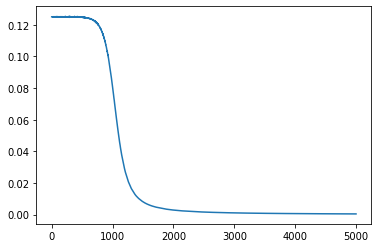

In [224]:
plt.plot(cost_list)

In [226]:
print("the prediction is ",classy_NN.predict([0,0,0,0,0,0,0,1]))
print("final output",classy_NN.layer_a)
print("final edge matrices",classy_NN.edge_matrices)
print("final biases",classy_NN.biases)

the prediction is  [0.96953577]
final output [array([0.81140032, 0.56024439, 0.14445846]), array([0.96953577])]
final edge matrices [array([[-1.46396854, -1.46052472, -1.46088257, -1.46351209,  1.45403585,
         1.46210451,  1.46388562,  1.45212703],
       [-0.22884753, -0.22723708, -0.22195092, -0.22852798,  0.23119365,
         0.22831369,  0.22795817,  0.22979209],
       [ 1.77355236,  1.77727188,  1.77652394,  1.76748151, -1.77398369,
        -1.76982129, -1.76823989, -1.77442064]]), array([[ 4.53895361,  0.67551382, -5.66230786]])]
final biases [array([ 0.00700787,  0.01236186, -0.004322  ]), array([0.21687133])]


Part 2 Question 3
these chunks implement classification of rap1 sequences, 

In [471]:
setup = [68,20,10,1]
alpha = 0.5
lamba = 0 #0.1 is good
rap1_NN = NN.NeuralNetwork(setup,NN.activation,alpha,lamba)

In [472]:
rap1_pos_list = io.import_positives('data/rap1-lieb-positives.txt')
genom_neg_list = io.import_negatives('data/yeast-upstream-1k-negative.fa',17)
rap1_test_list = io.import_positives('data/rap1-lieb-test.txt')

In [473]:
epoch_number = 5 # the number of times through the whole data set
batch_size = 20
number_positives = len(rap1_pos_list)
number_neg = number_positives*3
genom_neg_short = []

#create a negative set of the same size as positive input set randomly chosen from genome list
for i in range(number_neg):
    rand_index = int(numpy.floor(rand.random()*(len(genom_neg_list)-1)))
    genom_neg_short.append(genom_neg_list[rand_index])

    
combo_training_list = rap1_pos_list + genom_neg_short
combo_answer_list    = numpy.ones((number_positives))
combo_answer_list    = numpy.concatenate((combo_answer_list,numpy.zeros((number_neg))))
zipped_full_train    = list(zip(combo_training_list,combo_answer_list))
rand.shuffle(zipped_full_train)
shuffle_train_list, shuffle_answer_list = zip(*zipped_full_train)


cost_list = rap1_NN.train(epoch_number,batch_size,shuffle_train_list,shuffle_answer_list)

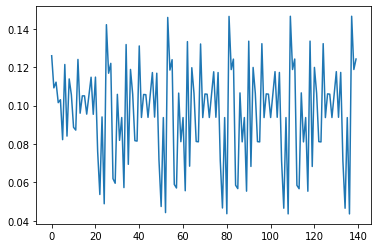

In [474]:
plt.plot(cost_list)

In [465]:
pos_test = io.one_hot_encode([rap1_pos_list[100]])
pos_test = pos_test[0]
print("Prediction of positive test is ",rap1_NN.predict(pos_test))


Prediction of positive test is  [0.97101777]


In [466]:
neg_test = io.one_hot_encode([genom_neg_list[100]])
neg_test = neg_test[0]
print("Prediction of negative test is ", rap1_NN.predict(neg_test))

Prediction of negative test is  [0.00019777]


These chunks implement part 3 question 5

In [467]:
test_scores = []
for i in range(len(rap1_test_list)):
    test_test = io.one_hot_encode([rap1_test_list[i]])
    test_test = test_test[0]
    test_scores.append(rap1_NN.predict(test_test)[0])

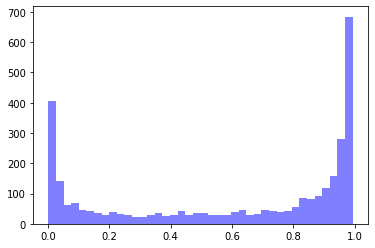

In [468]:
num_bins = 40
n, bins, patches = plt.hist(test_scores, num_bins, facecolor = 'blue', alpha = 0.5)
plt.show()

In [ ]:
these chunks implement k-fold cross validation

In [512]:
#instantiate the neural network
setup = [68,20,1]
alpha = 0.1
lamba = 0 #0.1 is good
batch_size = 20
epoch_number = 3
k = 4

In [513]:
rap1_pos_list = io.import_positives('data/rap1-lieb-positives.txt')
genom_neg_list = io.import_negatives('data/yeast-upstream-1k-negative.fa',17)
rap1_test_list = io.import_positives('data/rap1-lieb-test.txt')

In [514]:
number_positives = len(rap1_pos_list)
number_neg = number_positives*3
genom_neg_short = []

#create a negative set of the same size as positive input set randomly chosen from genome list
for i in range(number_neg):
    rand_index = int(numpy.floor(rand.random()*(len(genom_neg_list)-1)))
    genom_neg_short.append(genom_neg_list[rand_index])

    
combo_training_list = rap1_pos_list + genom_neg_short
combo_answer_list    = numpy.ones((number_positives))
combo_answer_list    = numpy.concatenate((combo_answer_list,numpy.zeros((number_neg))))
zipped_full_train    = list(zip(combo_training_list,combo_answer_list))
rand.shuffle(zipped_full_train)
shuffle_train_list, shuffle_answer_list = zip(*zipped_full_train)

In [515]:
 roc_FPRs, roc_TPRs  = NN.k_fold_validation(shuffle_train_list,shuffle_answer_list,epoch_number,batch_number,setup,alpha,lamba,k)

k size is 137
0.1676553992021899
0.0
0.21597968587902944
0.0
0.20126320081605842
0.0
0.2496977597738673
0.0


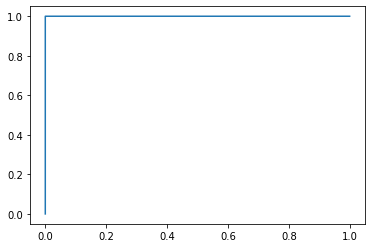

In [516]:
plt.plot(roc_FPRs[3],roc_TPRs[3])

In [517]:
roc_AUCs = NN.roc_auc_list(roc_TPRs,roc_FPRs)

In [521]:
roc_AUCs[3]

1.0000000000000016